# Academic Research on FER Datasets


The project primarily utilized the following:

Requests: For accessing web pages.

...

## 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from scholarly import scholarly
from googlesearch import search
from bs4 import BeautifulSoup
import requests
import re

## 2: Define FER Datasets and research topics

using dataset list from here:
https://arxiv.org/pdf/1804.08348v2

In [2]:
fer_datasets = ["CK+", "MMI", "JAFFE", "TFD", "FER-2013", "AFEW7.0", 
    "SFEW2.0", "Multi-PIE", "BU-3DFE", "Oulu-CASIA", 
    "RaFD", "KDEF", "EmotioNet", "RAF-DB", "AffectNet", "ExpW"]


In [3]:
fer_datasets_LONG = [
    "Extended Cohn-Kanade", 
    'MMI Facial Expression',
    "Japanese Female Facial Expression", 
    "Toronto Face Database",
    "Binghamton University 3D Facial Expression",
    "Oulu-CASIA",
    "Radboud Faces Database",
    "Karolinska Directed Emotional Faces",
    "Acted Facial Expressions In The Wild",
    "Static Facial Expression in the Wild",
    "CMU Multi-PIE",
    "Affective Faces Database",
    "Expression in-the-Wild"
]


In [11]:
topics = ["facial expression recognition", "FER", "deep learning", "machine learning", "classification", "classifier", "neural network", "CNN"]

## 3: Search arXiv API

not sufficient - no citation count - probably could be solved with SemanticScholar, but in reality it was not working

## 4: Use CrossRef API for Citation Counts

There were only researh papers found in this topic cited less than 50

## 5: Collect Data from Scholarly
Issue: no year filter, can be done later....

In [13]:
'''# Function to search scholarly papers and collect extended information
def search_scholarly(query):
    search_query = scholarly.search_pubs(query)
    papers = []
    
    # Try to fetch a larger set of results to ensure we capture the most cited papers
    for _ in range(35):  # Adjust this number as needed (e.g., 35)
        try:
            paper = next(search_query)
            # Collecting only papers with more than a certain citation threshold (e.g., 100)
            if 'num_citations' in paper and paper['num_citations'] >= 100:
                paper_info = {
                    'Title': paper['bib'].get('title', 'No Title'),
                    'Authors': paper['bib'].get('author', 'No Author'),
                    'Year': paper['bib'].get('pub_year', None),
                    'Cited By': paper['num_citations'],
                    'Dataset': query,
                    'Abstract': paper['bib'].get('abstract', ''),  # Extract abstract if available
                    'URL': None  # Initialize URL as None
                }

                # Check for mentions of "bias", "F1", or "accuracy" in the abstract
                abstract = paper_info['Abstract'].lower() if paper_info['Abstract'] else ''
                paper_info['Mentions_F1'] = 'f1' in abstract
                paper_info['Mentions_Accuracy'] = 'accuracy' in abstract
                paper_info['Mentions_Bias'] = 'bias' in abstract
                
                # Perform a Google search to find the paper's URL
                try:
                    search_results = search(paper_info['Title'], num_results=1)  # Get the top search result
                    for url in search_results:
                        paper_info['URL'] = url
                        break  # Only take the first result
                except Exception as e:
                    print(f"Error finding URL for {paper_info['Title']}: {e}")
                    paper_info['URL'] = None
                
                papers.append(paper_info)
                
                # If we've collected 10 highly cited papers, break out of the loop
                if len(papers) >= 10:
                    break

            time.sleep(2)  # Add delay to avoid rate limits
        except StopIteration:
            break
        except Exception as e:
            print(f"An error occurred: {e}")
            continue
    
    return papers

# Collect data from Scholarly for each combination of dataset and topic
scholarly_results = []

for dataset in fer_datasets_LONG:
    for topic in topics:
        combined_query = f"{dataset} {topic}"
        print(f"Searching for combination: {combined_query}")
        scholarly_results.extend(search_scholarly(combined_query))

# Store results in a DataFrame
scholarly_df = pd.DataFrame(scholarly_results)

scholarly_df.to_csv('scholarly_papers_combined.csv', index=False)
print("Data collection completed.")
'''

Searching for combination: Extended Cohn-Kanade facial expression recognition
Searching for combination: Extended Cohn-Kanade FER
Searching for combination: Extended Cohn-Kanade deep learning
Searching for combination: Extended Cohn-Kanade machine learning
Searching for combination: Extended Cohn-Kanade classification
Searching for combination: Extended Cohn-Kanade classifier
Searching for combination: Extended Cohn-Kanade neural network
Searching for combination: Extended Cohn-Kanade CNN
Searching for combination: MMI Facial Expression facial expression recognition
Searching for combination: MMI Facial Expression FER
Searching for combination: MMI Facial Expression deep learning
Searching for combination: MMI Facial Expression machine learning
Searching for combination: MMI Facial Expression classification
Searching for combination: MMI Facial Expression classifier
Searching for combination: MMI Facial Expression neural network
Searching for combination: MMI Facial Expression CNN
Sear

In [17]:
'''file_path = 'scholarly_papers3.csv'  
FER_df = pd.read_csv(file_path)
print(FER_df.shape)
FER_df.head()'''

"file_path = 'scholarly_papers3.csv'  \nFER_df = pd.read_csv(file_path)\nprint(FER_df.shape)\nFER_df.head()"

In [15]:
FER_df = FERComb_df

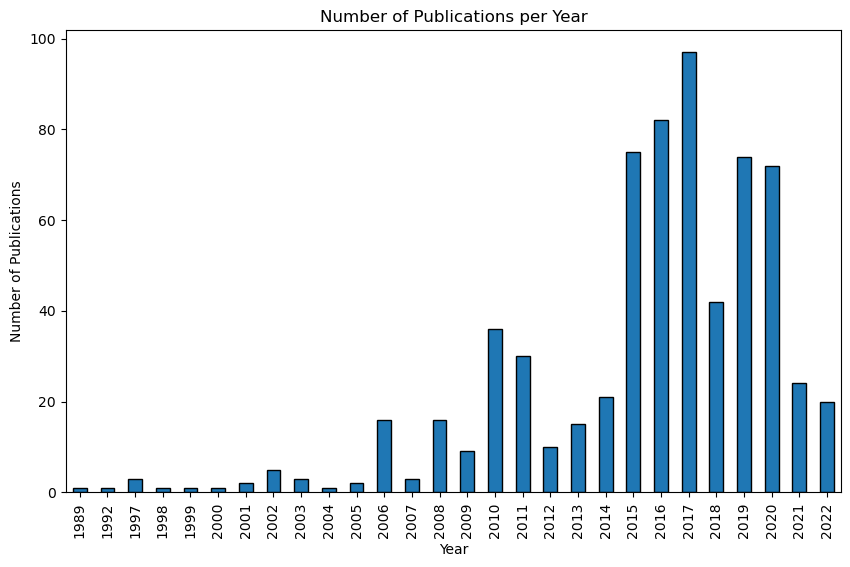

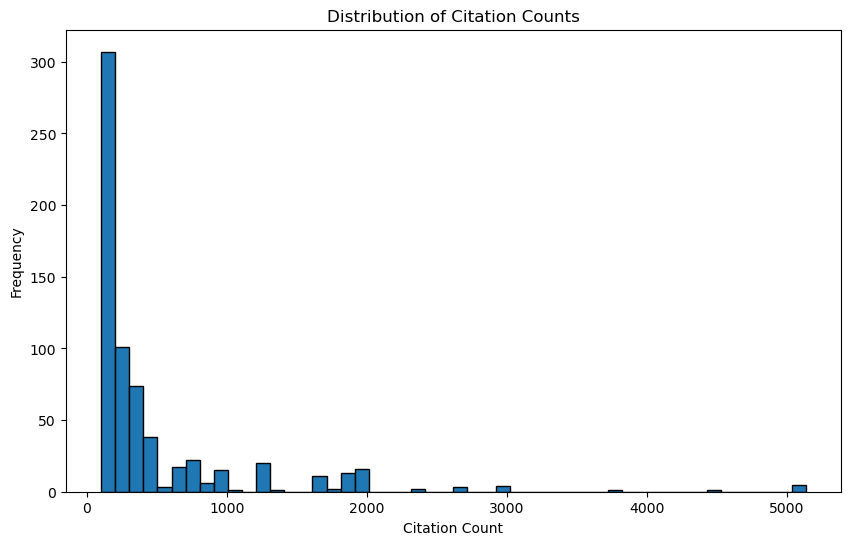

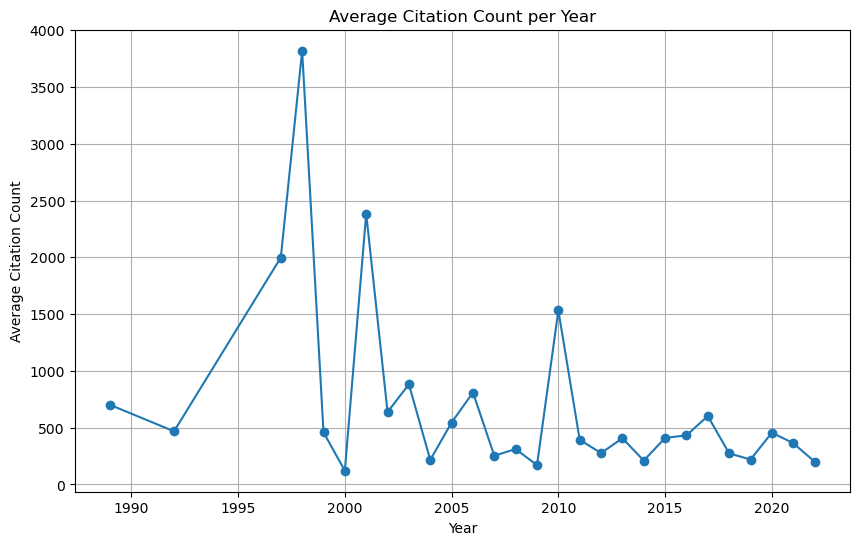

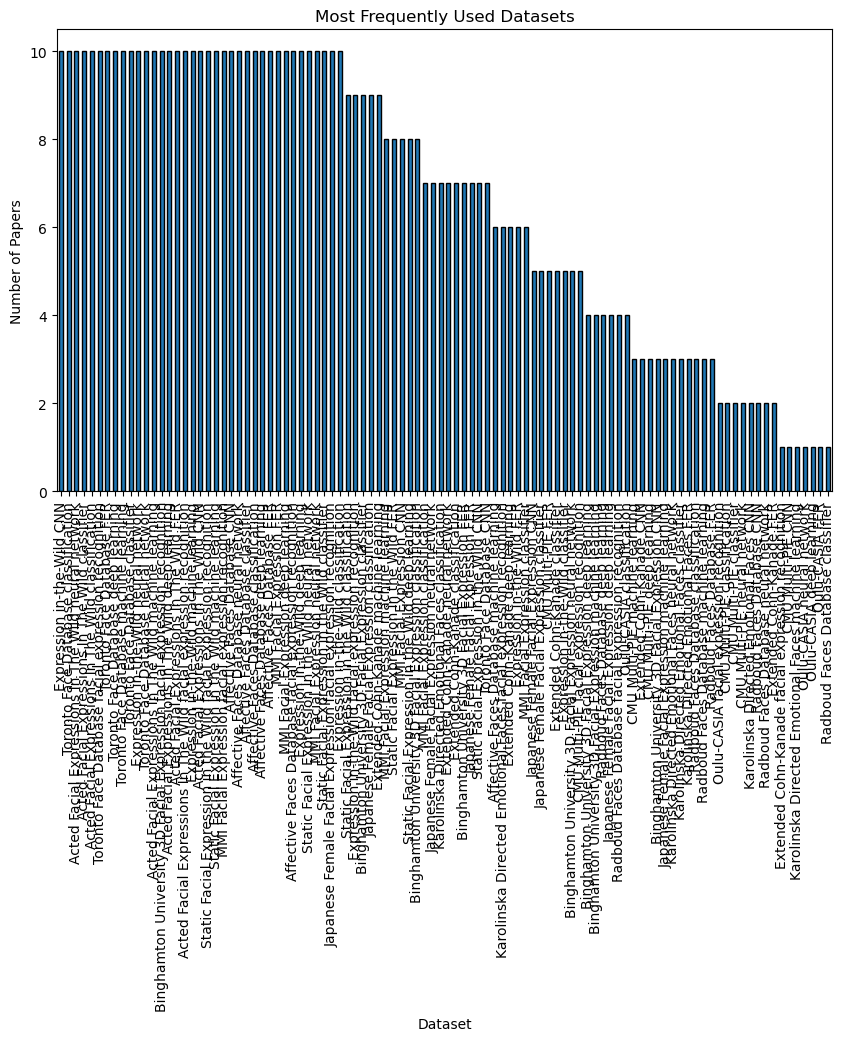

In [16]:
# Plot 1: Distribution of publications over the years
plt.figure(figsize=(10, 6))
FER_df['Year'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

# Plot 2: Distribution of citation counts
plt.figure(figsize=(10, 6))
plt.hist(FER_df['Cited By'], bins=50, edgecolor='black')
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Average citation count per year
avg_citations_per_year = FER_df.groupby('Year')['Cited By'].mean()
plt.figure(figsize=(10, 6))
avg_citations_per_year.plot(kind='line', marker='o')
plt.title('Average Citation Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Citation Count')
plt.grid(True)
plt.show()

# Plot 4: Most frequently used datasets
plt.figure(figsize=(10, 6))
FER_df['Dataset'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Most Frequently Used Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Papers')
plt.show()

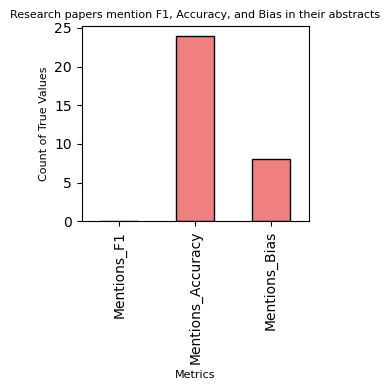

In [18]:
# Calculate the count of True values in each column
true_values_count = FER_df[['Mentions_F1', 'Mentions_Accuracy', 'Mentions_Bias']].sum()

# Plotting the count of true values
plt.figure(figsize=(3,4))
true_values_count.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding title and labels
plt.title('Research papers mention F1, Accuracy, and Bias in their abstracts', fontsize=8)
plt.ylabel('Count of True Values', fontsize=8)
plt.xlabel('Metrics', fontsize=8)

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:
df = pd.read_csv('scholarly_papers.csv')

# Custom headers to mimic a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Updated function to fetch the full text from a given URL with headers
def fetch_full_text(url):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Check for request errors
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extracting all paragraphs
        paragraphs = soup.find_all('p')
        full_text = ' '.join([p.get_text() for p in paragraphs])
        
        return full_text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching full text from {url}: {e}")
        return None

# Function to check for F1, accuracy, and bias mentions using regex
def check_metrics_in_text(full_text):
    mentions_f1 = bool(re.search(r'\bf1\b', full_text, re.IGNORECASE))
    mentions_accuracy = bool(re.search(r'\baccuracy\b', full_text, re.IGNORECASE))
    mentions_bias = bool(re.search(r'\bbias\b', full_text, re.IGNORECASE))
    
    return mentions_f1, mentions_accuracy, mentions_bias

# Adding new columns for full text search results
df['Full_Text'] = None
df['Mentions_F1_Full_Text'] = False
df['Mentions_Accuracy_Full_Text'] = False
df['Mentions_Bias_Full_Text'] = False

# Loop through the URLs in the DataFrame and fetch the full text, then check for metrics
for index, row in df.iterrows():
    if pd.notna(row['URL']):  # Ensure there's a valid URL
        print(f"Accessing full text for: {row['Title']} at {row['URL']}")
        full_text = fetch_full_text(row['URL'])
        
        if full_text:
            df.at[index, 'Full_Text'] = full_text
            f1, accuracy, bias = check_metrics_in_text(full_text)
            df.at[index, 'Mentions_F1_Full_Text'] = f1
            df.at[index, 'Mentions_Accuracy_Full_Text'] = accuracy
            df.at[index, 'Mentions_Bias_Full_Text'] = bias
        
        # Adding a delay to avoid rate-limiting issues
        time.sleep(5)  # Increase the delay if you continue experiencing blocks

# Save the updated DataFrame to a new CSV file
df.to_csv('scholarly_papers_with_full_text.csv', index=False)

# Display the DataFrame with the newly added columns (for environments that support DataFrame visualization)
import ace_tools as tools; tools.display_dataframe_to_user(name="Updated Scholarly Papers DataFrame", dataframe=df)


Accessing full text for: The extended cohn-kanade dataset (ck+): A complete dataset for action unit and emotion-specified expression at https://ieeexplore.ieee.org/document/5543262
Accessing full text for: A Novel Platform for Detection of CK+ and CK− CTCs at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3237635/
Accessing full text for: All circulating EpCAM+ CK+ CD45-objects predict overall survival in castration-resistant prostate cancer at https://pubmed.ncbi.nlm.nih.gov/20147742/
Accessing full text for: Patterns of circulating tumor cells identified by CEP8, CK and CD45 in pancreatic cancer at https://pubmed.ncbi.nlm.nih.gov/25042121/
Accessing full text for: Detection of breast cancer cells in the peripheral blood is positively correlated with estrogen‐receptor status and predicts for poor prognosis at https://pubmed.ncbi.nlm.nih.gov/14601059/
Accessing full text for: Optimal policies for the inventory problem with negotiable leadtime at https://www.jstor.org/stable/2627513
Error

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Accessing full text for: Design of an ultracompact MMI wavelength demultiplexer in slot waveguide structures at https://opg.optica.org/oe/fulltext.cfm?uri=oe-15-13-8300
Accessing full text for: MMI training for continuous phoneme recognition on the TIMIT database at https://ieeexplore.ieee.org/document/319349/
Accessing full text for: End-to-end Speech Recognition Using Lattice-free MMI. at https://www.danielpovey.com/files/2018_interspeech_end2end.pdf


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Accessing full text for: Performance comparisons of facial expression recognition in JAFFE database at https://www.cin.ufpe.br/~rps/Artigos/Performance%20Comparisons%20of%20Facial%20Expression%20Recognition%20in%20Jaffe%20Database.pdf


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Accessing full text for: Estimation of creatinine by the Jaffe reaction: a comparison of three methods at https://pubmed.ncbi.nlm.nih.gov/5637963/
Accessing full text for: A Study of the Mechanism of the Jaffé Reaction at https://d-nb.info/1207639168/34


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Accessing full text for: Geographic localization of knowledge spillovers as evidenced by patent citations at https://www.jstor.org/stable/2118401
Error fetching full text from https://www.jstor.org/stable/2118401: 403 Client Error: Forbidden for url: https://www.jstor.org/stable/2118401
Accessing full text for: Creatinine determination according to Jaffe—what does it stand for? at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4421578/
Accessing full text for: Plasma creatinine determination a new and specific Jaffe reaction method at https://pubmed.ncbi.nlm.nih.gov/5838275/
Accessing full text for: Rho GTPases: biochemistry and biology at https://pubmed.ncbi.nlm.nih.gov/16212495/
Accessing full text for: Technological opportunity and spillovers of R&D: evidence from firms' patents, profits and market value at https://www.jstor.org/stable/1816464
Error fetching full text from https://www.jstor.org/stable/1816464: 403 Client Error: Forbidden for url: https://www.jstor.org/stable/1816464
A

KeyboardInterrupt: 